In [2]:
import pandas as pd

benin = pd.read_csv('data/benin_clean.csv')
sierra_leone = pd.read_csv('data/sierraleone_clean.csv')
togo = pd.read_csv('data/togo_clean.csv')

benin['country'] = 'Benin'
sierra_leone['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

df = pd.concat([benin, sierra_leone, togo])


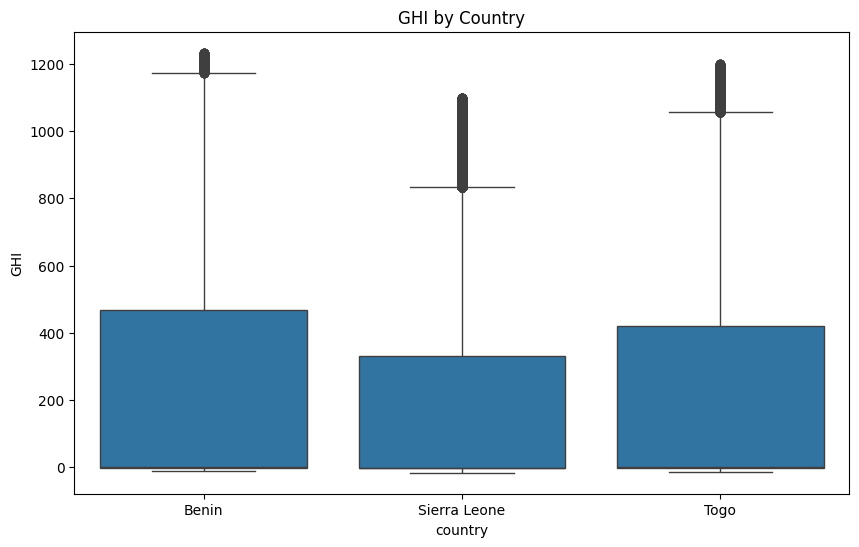

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='country', y='GHI', data=df)
plt.title("GHI by Country")
plt.show()


In [4]:
summary = df.groupby('country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
country                                                                     
Benin         236.12    0.7  328.21  166.81   -0.1  262.01  111.63    0.4   
Sierra Leone  185.36   -0.4  279.54  104.37   -0.1  201.27  108.24   -0.6   
Togo          223.09    0.4  316.70  147.48    0.0  247.37  112.52    1.4   

                      
                 std  
country               
Benin         153.10  
Sierra Leone  153.81  
Togo          151.45

In [5]:
from scipy.stats import f_oneway

f_oneway(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)


F_onewayResult(statistic=np.float64(3730.2912432752205), pvalue=np.float64(0.0))

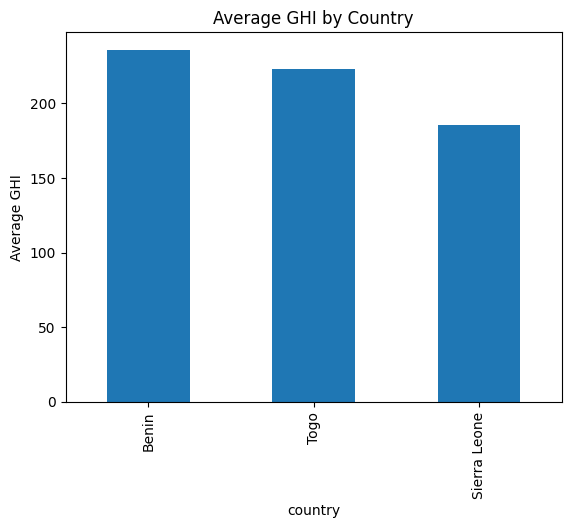

In [7]:
ghi_avg = df.groupby('country')['GHI'].mean().sort_values(ascending=False)

ghi_avg.plot(kind='bar', title='Average GHI by Country')
plt.ylabel('Average GHI')
plt.show()
